In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pickle
import numpy as np



#f = open('driftExplorerNoBombDurGrid.pickle', 'rb')
f = open('CSTests.pickle', 'rb')
data = pickle.load(f)

In [2]:
print(data['var'])
print()
print(data['order'])
print()
for key in data['data'][list(data['data'].keys())[0]][0].keys():
    print(key)

{'reclusterThreshold': [0.01, 0.025, 0.05], 'smallImprovement': [0.2, 0.3], 'globalRecluster': [0, 2], 'GRDecrement': [0.7, 0.75]}

['smallImprovement', 'globalRecluster', 'GRDecrement', 'reclusterThreshold']

Number of clusters
Clusters below thresh
# False Positive Wind
BTGlobalRecluster
Distances
config
Detection Time
Lost readings
Recluster period
# False Positives
True Positive Findings
# False Positive Drift
# True Positive = Rejections
BTLocalRecluster
Max Battery
CS Joins
Samples
# False Positive Confirmations
# Total False Negatives
BTReadings
CS Solos
Clusters above thresh
Alive valid nodes
Average Battery
# True Positive Rejections
Percent Alive
Recluster threshold
Bluetooth
Avg cluster size
# False Positive = Confirmations
Local Reclusters
Waits
# False Negatives Drift
Cluster searches
Wifi
Global reclusters
# False Positive Rejections
# Total False Positives
True Positive Readings
Alone nodes
# False Negatives
Min Battery
BTClusterSearch


In [3]:
i = 0
for key in data['data'].keys():
    i += len(data['data'][key])
print(i)

28


In [4]:
def compareOverTime(compare, keyInds, ignoreDict={}):
    stats = {}
    counts = {}
    minArrLen = 10000000
    ignore = False
    for key in data['data'].keys():
        for ind in ignoreDict:
            if key[ind] == ignoreDict[ind]:
                ignore = True
        if not ignore:
            for run in data['data'][key]:
                keyStrs = []
                for ind in keyInds:
                    keyStrs += [str(key[ind])]
                statsKey = '-'.join(keyStrs)
                arr = run[compare]
                minArrLen = min(minArrLen, len(arr))
                if statsKey in stats.keys():
                    for i in range(minArrLen):
                        stats[statsKey][i] += arr[i]
                    counts[statsKey] += 1
                else:
                    stats[statsKey] = []
                    for i in range(minArrLen):
                        stats[statsKey] += [arr[i]]
                    counts[statsKey] = 1
        else:
            ignore = False
    for key in stats.keys():
        for i in range(minArrLen):
            stats[key][i] = stats[key][i]/counts[key]
    stats['compare'] = compare
    stats['minArrLen'] = minArrLen
    stats['keyInds'] = keyInds
    stats['ignore'] = ignoreDict
    return stats

In [5]:
def generateOverTimeGraphsHelper(keyInds, stats, x, separationLevel, currentLevel, strArr, titleArr, topY):
    legendTitle = ''
    if currentLevel < len(keyInds):
        currentKey = data['order'][keyInds[currentLevel]]
        for var in data['var'][currentKey]:
            if not (currentKey in stats['ignore'] and stats['ignore'][currentKey] == var):
                legendTitle = generateOverTimeGraphsHelper(keyInds, stats, x, separationLevel, currentLevel + 1, strArr + [str(var)], titleArr + [str(currentKey)], topY)
    else:
        key = '-'.join(strArr)
        if key in stats.keys():
            y = stats[key]
            label = '-'.join(strArr[separationLevel:])
            plt.plot(x, y, label=label)
            legendTitle = '-'.join(titleArr[separationLevel:])
    if currentLevel == separationLevel:
        title = '-'.join(titleArr) + ': '
        title += '-'.join(strArr)
        plt.xlabel('Time')
        plt.ylabel(stats['compare'])
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=legendTitle)
        #plt.legend(title=legendTitle)
        bottom, top = plt.ylim()
        if topY != 0:
            plt.ylim(bottom, topY)
        plt.title(title)
        plt.show()
    return legendTitle

def generateOverTimeGraphs(stats, separationLevel=0, topY=0):
    generateOverTimeGraphsHelper(stats['keyInds'], stats, [i for i in range(stats['minArrLen'])], separationLevel, 0, [], [], topY)

In [6]:
NumGlobalReclusters = compareOverTime('Global reclusters', [1,3])

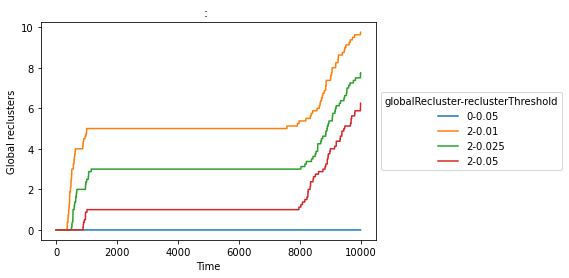

In [7]:
generateOverTimeGraphs(NumGlobalReclusters, 0)

In [8]:
ReclusterThresh = compareOverTime('Recluster threshold', [1,3])

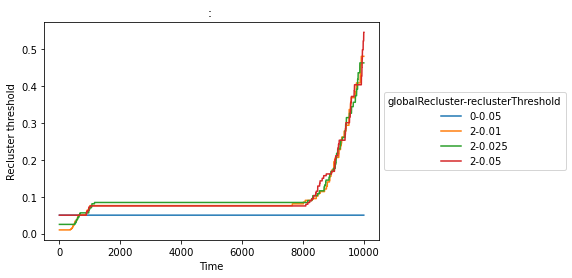

In [9]:
generateOverTimeGraphs(ReclusterThresh, separationLevel=0)

In [12]:
Alive = compareOverTime('Percent Alive', [1,3])

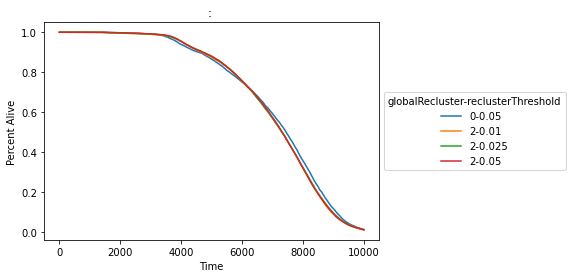

In [13]:
generateOverTimeGraphs(Alive, 0)

In [10]:
AvgBattery = compareOverTime('Average Battery', [1,3])

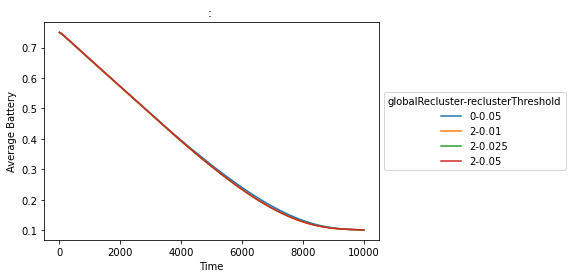

In [11]:
generateOverTimeGraphs(AvgBattery, 0)

In [14]:
Wifi = compareOverTime('Wifi', [1,3])

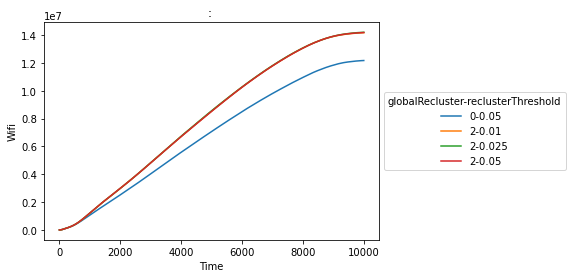

In [15]:
generateOverTimeGraphs(Wifi, 0)

In [17]:
clusterSize = compareOverTime('Avg cluster size', [2,3])

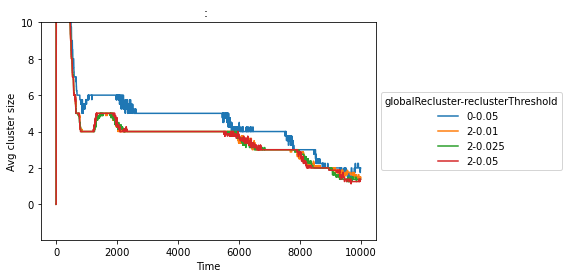

In [18]:
generateOverTimeGraphs(clusterSize, topY=10)

In [18]:
BTRecluster = compareOverTime('BTGlobalRecluster', [1,3])

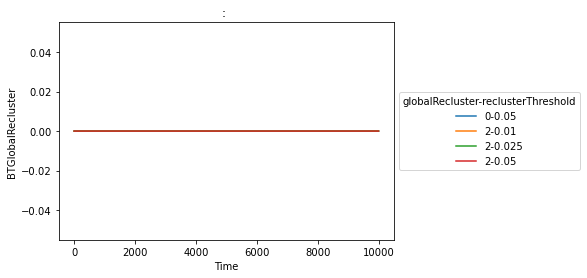

In [19]:
generateOverTimeGraphs(BTRecluster, separationLevel=0)

In [20]:
BTClusterSearch = compareOverTime('BTClusterSearch', [1,3])

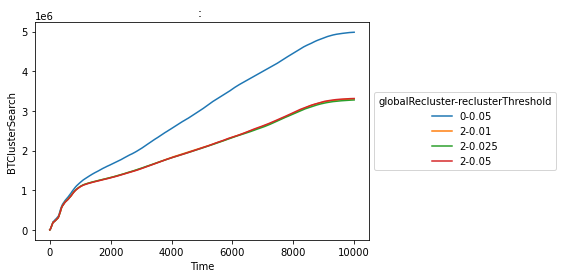

In [21]:
generateOverTimeGraphs(BTClusterSearch, separationLevel=0)

In [22]:
BT = compareOverTime('Bluetooth', [1,3])

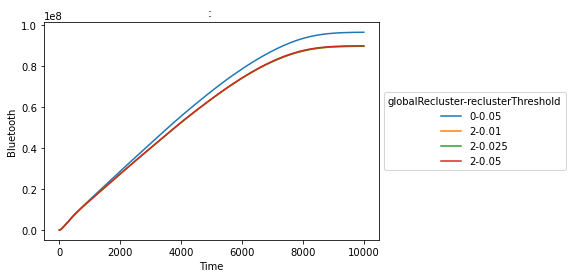

In [23]:
generateOverTimeGraphs(BT, separationLevel=0)

In [24]:
CS = compareOverTime('Cluster searches', [1,3])

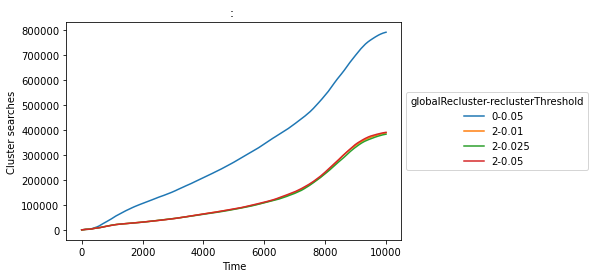

In [25]:
generateOverTimeGraphs(CS, separationLevel=0)

In [26]:
CSSolos = compareOverTime('CS Solos', [1,3])

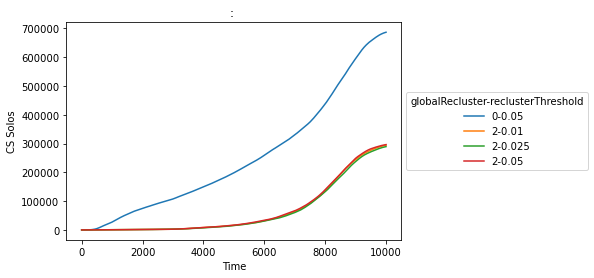

In [27]:
generateOverTimeGraphs(CSSolos, separationLevel=0)

In [28]:
CSJoins = compareOverTime('CS Joins', [1,3])

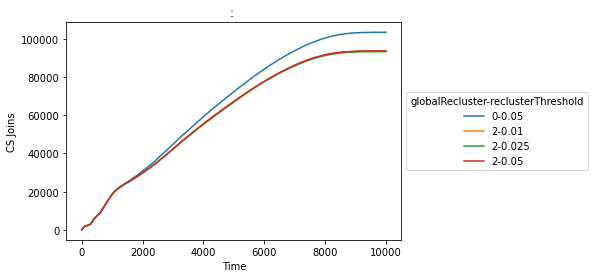

In [29]:
generateOverTimeGraphs(CSJoins, separationLevel=0)

In [30]:
above = compareOverTime('Clusters above thresh', [1,3])

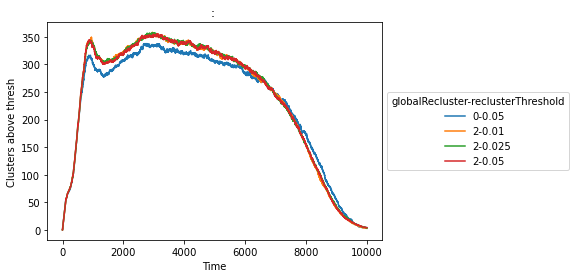

In [31]:
generateOverTimeGraphs(above, separationLevel=0)

In [32]:
below = compareOverTime('Clusters below thresh', [1,3])

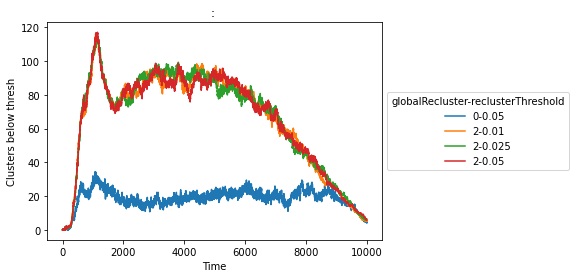

In [33]:
generateOverTimeGraphs(below, separationLevel=0)